### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

1.8328356017655123


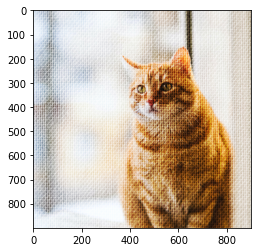

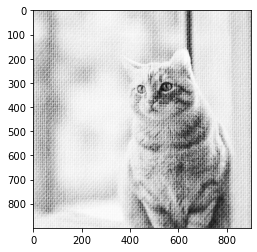

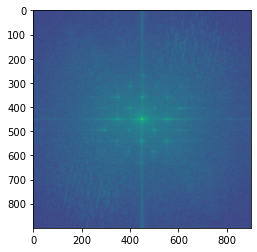

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fftpack
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
#image = mpimg.imread('pattern2.jpg')

grayim = image[:,:,0]



norm = np.sqrt(grayim.shape[0] * grayim.shape[1])

D1_image = fftpack.fft2(grayim)/norm
D2_image = fftpack.fftshift(D1_image)
#D3 = fftpack.fft2(D1)/norm

abs_image = np.abs(D2_image)**0.05
print(abs_image.max())
py.imshow(image)
py.show()
py.imshow(grayim, cmap=plt.get_cmap('gray'))
py.show()
py.imshow(abs_image)
py.show()

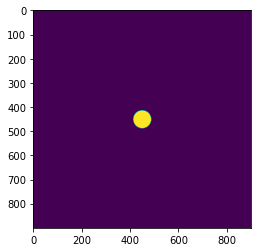

In [51]:
n = 901
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 37

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

#M = np.where(X**2 + Y**2 < R**2, 1, 0.3)
M = X**2 + Y**2 < R**2

D1 = fftpack.fft2(M)/n
D2 = fftpack.fftshift(D1)

D3 = fftpack.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

[[200 202 204 ... 196 197 199]
 [199 200 202 ... 194 196 197]
 [197 199 200 ... 193 194 195]
 ...
 [205 207 209 ... 200 202 203]
 [204 205 207 ... 199 200 202]
 [202 204 205 ... 197 199 200]]


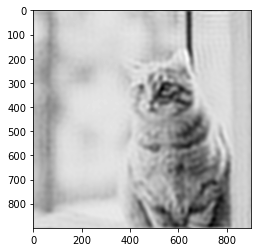

In [52]:
low_pass_image = M * D2_image
shifted_D2 = fftpack.fftshift(low_pass_image)
image_inv = fftpack.ifft2(shifted_D2)
image_inv = np.abs(image_inv)
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
print(image_inv)
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))

# steps
So for this to work we have remove the cages, I believe that cages contain high frequencies so I used low pass to blur the image up abit to the point these line of cages are significant. R or the radius has an effect on this since the higher it is the more frequencies can go in so I set in arounf 30 - 40 so most of the high frequencies are blocked. also I tried to smooth it out a bit using np.where so unwanted will not fully attenuates but I fail so I reverted to normal low pass of 0 and 1. 